# Lab 6: Intro to data wrangling
## Tibbles
We've used tibbles to construct examples in the past. For example, in lab 3, we used a tibble to demonstrate how  𝚊𝚛𝚛𝚊𝚗𝚐𝚎arrange  works:

In [1]:
require(tidyverse)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# create a tibble
tbl = tibble(x = c(5, NA, 2))
print(tbl)

# A tibble: 3 x 1
      x
  <dbl>
1     5
2    NA
3     2


In [3]:
arrange(tbl, x)

x
2
5
NA


In [4]:
class(iris)

[1] "data.frame"

In [6]:
class(as_tibble(iris))

[1] "tbl_df"     "tbl"        "data.frame"

In [8]:
iris_tbl = as_tibble(iris)
print(iris_tbl)

# A tibble: 150 x 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl>  <fctr>
 1          5.1         3.5          1.4         0.2  setosa
 2          4.9         3.0          1.4         0.2  setosa
 3          4.7         3.2          1.3         0.2  setosa
 4          4.6         3.1          1.5         0.2  setosa
 5          5.0         3.6          1.4         0.2  setosa
 6          5.4         3.9          1.7         0.4  setosa
 7          4.6         3.4          1.4         0.3  setosa
 8          5.0         3.4          1.5         0.2  setosa
 9          4.4         2.9          1.4         0.2  setosa
10          4.9         3.1          1.5         0.1  setosa
# ... with 140 more rows


Another way to create a tibble is with tribble(), short for transposed tibble. tribble() is customised for data entry in code: column headings are defined by formulas (i.e. they start with ~), and entries are separated by commas. This makes it possible to lay out small amounts of data in easy to read form.

In [9]:
tribble(
  ~x, ~y, ~z,
  "a", 2, 3.6,
  "b", 1, 8.5
)

x,y,z
a,2,3.6
b,1,8.5


The benefit of tibble over dataframe is that it allows us to visualize and subset our data more easily.

## Printing

In [10]:
mytbl = 
tibble(
  a = lubridate::now() + runif(1e3) * 86400,
  b = lubridate::today() + runif(1e3) * 30,
  c = 1:1e3,
  d = runif(1e3),
  e = sample(letters, 1e3, replace = TRUE)
)

Run  𝚙𝚛𝚒𝚗𝚝(𝚖𝚢𝚝𝚋𝚕)  on the above command on an R console and it will only output the first 10 rows with each column having a clear data type.

You can explicitly  𝚙𝚛𝚒𝚗𝚝()  the data frame and control the number of rows (n) and the width of the display.  𝚠𝚒𝚍𝚝𝚑 = 𝙸𝚗𝚏width = Inf  will display all columns:

In [11]:
nycflights13::flights %>% 
  print(n = 12, width = Inf)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay carrier flight tailnum origin  dest air_time distance  hour minute           time_hour
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>     <dbl>   <chr>  <int>   <chr>  <chr> <chr>    <dbl>    <dbl> <dbl>  <dbl>              <dttm>
 1  2013     1     1      517            515         2      830            819        11      UA   1545  N14228    EWR   IAH      227     1400     5     15 2013-01-01 05:00:00
 2  2013     1     1      533            529         4      850            830        20      UA   1714  N24211    LGA   IAH      227     1416     5     29 2013-01-01 05:00:00
 3  2013     1     1      542            540         2      923            850        33      AA   1141  N619AA    JFK   MIA      160     1089     5     40 2013-01-01 05:00:00
 4  2013     1     1      544            545        -1     1004           1022       -18      B

## Subsetting
So far all the tools you’ve learned have worked with complete data frames. If you want to pull out a single variable, you need some new tools,  $  and  [[. [[  can extract by name or position; $ only extracts by name but is a little less typing.

In [12]:
df = tibble(
  x = rpois(5, 1),
  y = rgeom(5, 0.4)
)

In [13]:
df

x,y
2,0
1,1
0,0
0,0
1,1


In [14]:
df$x

[1] 2 1 0 0 1

In [15]:
df[['x']]


[1] 2 1 0 0 1

In [16]:
df[[x]]

ERROR: Error in `[[.tbl_df`(df, x): object 'x' not found


### Exercise
* How can you tell if an object is a tibble? (Hint: try printing mtcars, which is a regular data frame).

* Compare and contrast the following operations on a data.frame and equivalent tibble. What is different? Why might the default data frame behaviours cause you frustration?

In [17]:
df <- data.frame(abc = 1, xyz = "a")
# df$x
# df[, "xyz"]
# df[, c("abc", "xyz")]

* If you have the name of a variable stored in an object, e.g. var <- "mpg", how can you extract the reference variable from a tibble?

* Practice referring to non-syntactic names in the following data frame by:

- Extracting the variable called 1.

- Plotting a scatterplot of 1 vs 2.

- Creating a new column called 3 which is 2 divided by 1.

- Renaming the columns to one, two and three.

In [18]:
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)

## Data Import
Most of  𝚛𝚎𝚊𝚍𝚛’𝚜readr’s  functions are concerned with turning flat files into data frames:

read_csv() reads comma delimited files,  read_csv2()read_csv2()  reads semicolon separated files (common in countries where , is used as the decimal place),  read_tsv() reads tab delimited files, and read_delim() reads in files with any delimiter.

read_log() reads Apache style log files. (But also check out webreadr which is built on top of read_log() and provides many more helpful tools.)

In [22]:
require(MASS)
head(Boston)
write.csv(Boston, file = "~/Desktop/boston.csv", row.names = FALSE)
boston = read_csv("~/Desktop/boston.csv")

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file '/home/jovyan/Desktop/boston.csv': No such file or directory”

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


Notice that readr gets its column names from the first row of the CSV. If the first (or however many) has metadata instead of column names, you can use the following to indicate which line has the actual column names.

In [23]:
read_csv("The first line of metadata
  The second line of metadata
  x,y,z
  1,2,3", skip = 2)

x,y,z
1,2,3


In [24]:
read_csv("# A comment I want to skip
  x,y,z
  1,2,3", comment = "#")

x,y,z
1,2,3


Sometimes the columns don't have names. Then you can tell readr to create the column names itself.

In [25]:
read_csv("1,2,3\n4,5,6", col_names = FALSE)

X1,X2,X3
1,2,3
4,5,6


In [26]:
read_csv("1,2,3\n4,5,6", col_names = c("x", "y", "z"))

x,y,z
1,2,3
4,5,6


Another option that commonly needs tweaking is na: this specifies the value (or values) that are used to represent missing values in your file:

In [28]:
read_csv("a,b,c\n1,2,.", na = ".")

a,b,c
1,2,NA


## Intro to Tidy data

3 rules which make a dataset tidy:

* Each variable must have its own column.
* Each observation must have its own row.
* Each value must have its own cell.
table1 above is tidy.

Advantages of tidy data:

* Consistency of presentation

* There’s a specific advantage to placing variables in columns because it allows R’s vectorised nature to shine. As you learned in mutate and summary functions, most built-in R functions work with vectors of values. That makes transforming tidy data feel particularly natural.

In [29]:
# Compute rate per 10,000
table1 %>% 
  mutate(rate = cases / population * 10000)

country,year,cases,population,rate
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [30]:
# Compute cases per year
table1 %>% 
  count(year, wt = cases)

year,n
1999,250740
2000,296920


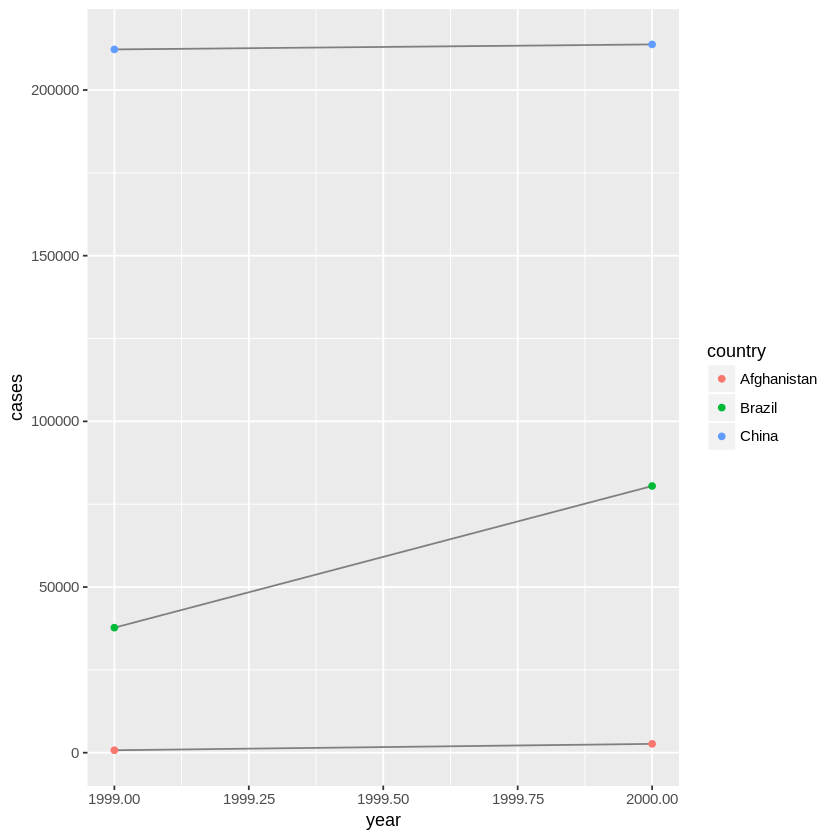

In [31]:
# Visualise changes over time
ggplot(table1, aes(year, cases)) + 
  geom_line(aes(group = country), colour = "grey50") + 
  geom_point(aes(colour = country))

## Gather

A common problem is a dataset where some of the column names are not names of variables, but  *values*  of a variable. Take table4a: the column names 1999 and 2000 represent values of the year variable, and each row represents two observations, not one.

In [33]:
table4a

country,1999,2000
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


To tidy a dataset like this, we need to gather those columns into a new pair of variables. To describe that operation we need three parameters:

* The set of columns that represent values, not variables. In this example, those are the columns 1999 and 2000.

* The name of the variable whose values form the column names. This is called  keykey , and here it is  yearyear .

* The name of the variable whose values are spread over the cells. This is called the  valuevalue , and here it’s the number of cases.

Note that “1999” and “2000” are non-syntactic names (because they don’t start with a letter) so we have to surround them in backticks

In [34]:
tidy_4a <- table4a %>% 
  gather(`1999`, `2000`, key = "year", value = "cases")
tidy_4a

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [35]:
table4b

country,1999,2000
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


In [36]:
tidy_4b <- table4b %>% 
  gather(`1999`, `2000`, key = "year", value = "population")
tidy_4b

country,year,population
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


In [37]:
left_join(tidy_4a, tidy_4b)

Joining, by = c("country", "year")


country,year,cases,population
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


## Spreading
Spreading is the opposite of gathering. You use it when an observation is scattered across multiple rows. For example, take table2: an observation is a country in a year, but each observation is spread across two rows.

In [38]:
table2

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


To tidy this up, we first analyse the representation in similar way to gather(). This time, however, we only need two parameters:

The column that contains variable names, the key column. Here, it’s *type*.

The column that contains values from multiple variables, the value column. Here it’s *count*.

Note that there's no need to use backticks here

In [40]:
table2
spread(table2, key = type, value = count)

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Exercises
* Why are gather() and spread() not perfectly symmetrical? Carefully consider the following example (note the variable types in the tibbles - not shown below):

In [41]:
stocks = tibble(
  year   = c(2015, 2015, 2016, 2016),
  half  = c(   1,    2,     1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
)
stocks

year,half,return
2015,1,1.88
2015,2,0.59
2016,1,0.92
2016,2,0.17


In [42]:
stocks %>% 
  spread(year, return) %>% 
  gather("year", "return", `2015`:`2016`)

half,year,return
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


Both spread() and gather() have a convert argument. What does it do?

## Regular expression
Useful lab notes from https://rawgit.com/byoungwookjang/stats406_f17_labs/master/lab7/Stats406Lab7.html

In [43]:
require(stringr)
our_state = "Michigan"
ne_states = c("Connecticut", "Maine", "Massachusetts", "Vermont", "New Hampshire", "Rhode Island")
our_state %in% ne_states

Loading required package: stringr


[1] FALSE

In [44]:
double_quote = '\"'

In [45]:
print(double_quote)

[1] "\""


In [46]:
writeLines(double_quote)

"


In [47]:
str_length(ne_states) # c("Connecticut", "Maine", "Massachusetts", "Vermont", "New Hampshire", "Rhode Island")

[1] 11  5 13  7 13 12

In [48]:
str_c("Addis Ababa", "Ethiopia", sep = ", ")

[1] "Addis Ababa, Ethiopia"

In [49]:
x = c("abc", NA)
print(x)

[1] "abc" NA   


In [50]:
str_c("|-", x, "-|")

[1] "|-abc-|" NA

In [51]:
str_c("|-", str_replace_na(x), "-|")

[1] "|-abc-|" "|-NA-|"

In [53]:
name = "Byoung"
time_of_day = "afternoon"
birthday = FALSE # January just passed :(

str_c(
  "Good ", time_of_day, " ", name,
  if (birthday) " and HAPPY BIRTHDAY",
  "."
)

[1] "Good afternoon Byoung."

In [54]:
str_sub(ne_states, 1, 3)

[1] "Con" "Mai" "Mas" "Ver" "New" "Rho"

In [55]:
str_sub(ne_states, 1, 7) # notice that this didn't fail for Maine

[1] "Connect" "Maine"   "Massach" "Vermont" "New Ham" "Rhode I"

In [63]:
ne_states = c("Connecticut, Maine, Massachusetts, Vermont", "New Hampshire", "Rhode Island")
str_replace(ne_states, ',', '')
str_replace_all(ne_states, ',', '')
str_replace_all(ne_states, ',', '\\s WHAT')
str_split(ne_states[1], '\\,')

[1] "Connecticut Maine, Massachusetts, Vermont"
[2] "New Hampshire"                            
[3] "Rhode Island"

[1] "Connecticut Maine Massachusetts Vermont"
[2] "New Hampshire"                          
[3] "Rhode Island"

[1] "Connecticuts WHAT Maines WHAT Massachusettss WHAT Vermont"
[2] "New Hampshire"                                            
[3] "Rhode Island"

[[1]]
[1] "Connecticut"    " Maine"         " Massachusetts" " Vermont"